## Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from read_ch4 import read_ch4
from chi_square_fit import chi_square_fit

Let us begin by writing the explicit form of our new line fit; we closely follow the procedure given in our lecture notes. The desire fit is thus given by:

$$y = A e^{Bx}$$

Taking the natural log of both sides gives:

$$\ln y = \ln A + Bx$$

A simple change of variables lets us re-cast this equation into a more familiar, linear form:

$$y' = a + Bx$$

where we have defined $y' = \ln y$ and $a = \ln A$. We now must define how the uncertainties change in our new variables. It is clear that the uncertainties in b remain untouched, while those in the constant $a$ are now given by:

$$d a = d \ln A = \frac{dA}{|A|}$$

As is apparent, this fit is significantly less laborous than that given in Problem 1 due to its underlying linear nature. We can now start plotting our data with the same procedure as for the linear fit given in the chi_square_fit.py file.

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

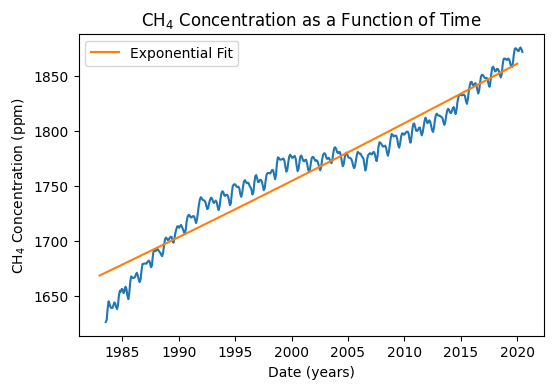

In [3]:
# Get the CH4 data
dates,data = read_ch4('ch4_mm_gl.txt')
plt.plot( dates, data )

data=np.log(data)
err = np.full_like(data, np.log(2.0))
a,B,sigma_a,sigma_B,chi_square = chi_square_fit(dates, data, err)

A = np.exp( a )
dA = sigma_a * np.abs(A)

# Plot fit
x = np.linspace(1983,2020,100)
y = A * np.exp(x*B)
plt.plot(x,y, label="Exponential Fit")
plt.legend(loc=0)

plt.title(r"CH$_{4}$ Concentration as a Function of Time")
plt.xlabel("Date (years)")
plt.ylabel(r"CH$_{4}$ Concentration (ppm)")

plt.show()


In [4]:
#Here we solve our exponetial equation for a given CH4 concentration x_k
k=50000
x_k = 1/B * np.log( k/ A)
if len(data) - 2 > 0 :
    print (' A = ', A, ' +- ', dA)
    print (' B = ', B, ' +- ', sigma_B)
    print (' Atmosphere becomes toxic at: ', x_k )

 A =  4.697701119007896  +-  28.96541018222763
 B =  0.002961420390186009  +-  0.00307981086539706
 Atmosphere becomes toxic at:  3131.1680873471537


As can be seen from the above graph, the exponential fit is not a good fit for our data. At this point I'm unsure if this is due to an error in my code or if it is simply the way it is, though the decrease in CH4 concentration that is apparent seems to point to the former since I do not believe it to be decreasing in our present situation.